In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/content/Customer Data.csv')

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# EDA

In [6]:
df.shape

(8950, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


We can see at first look that we have outliers in the data, in further analysis we might conduct ( feature scaling, remove outliers, transformation techniques,...)



In [9]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [10]:
def check_ratio(df, col):
  ratio = len(df[df[col].isnull()]) / len(df)
  percentage = ratio * 100
  return percentage

In [11]:
ratio = check_ratio(df, "MINIMUM_PAYMENTS")

print(f'Ratio of missing values in MINIMUM_PAYMENTS column: {round(ratio,2)}%')

Ratio of missing values in MINIMUM_PAYMENTS column: 3.5%


The percentage of the null values of minimum payements is 3.49%


<Axes: xlabel='MINIMUM_PAYMENTS', ylabel='Count'>

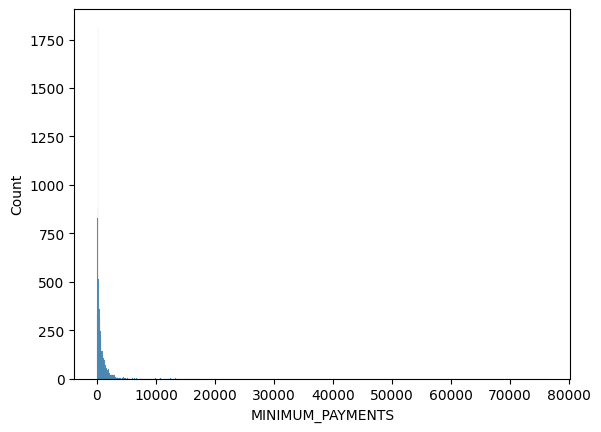

In [12]:
sns.histplot(df['MINIMUM_PAYMENTS'])

The minimum payements has outliers and the distribution is skewed, we're going to replace the null values with the median

In [13]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

In [14]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [15]:
df.drop(columns=['CUST_ID'], axis=1, inplace=True)

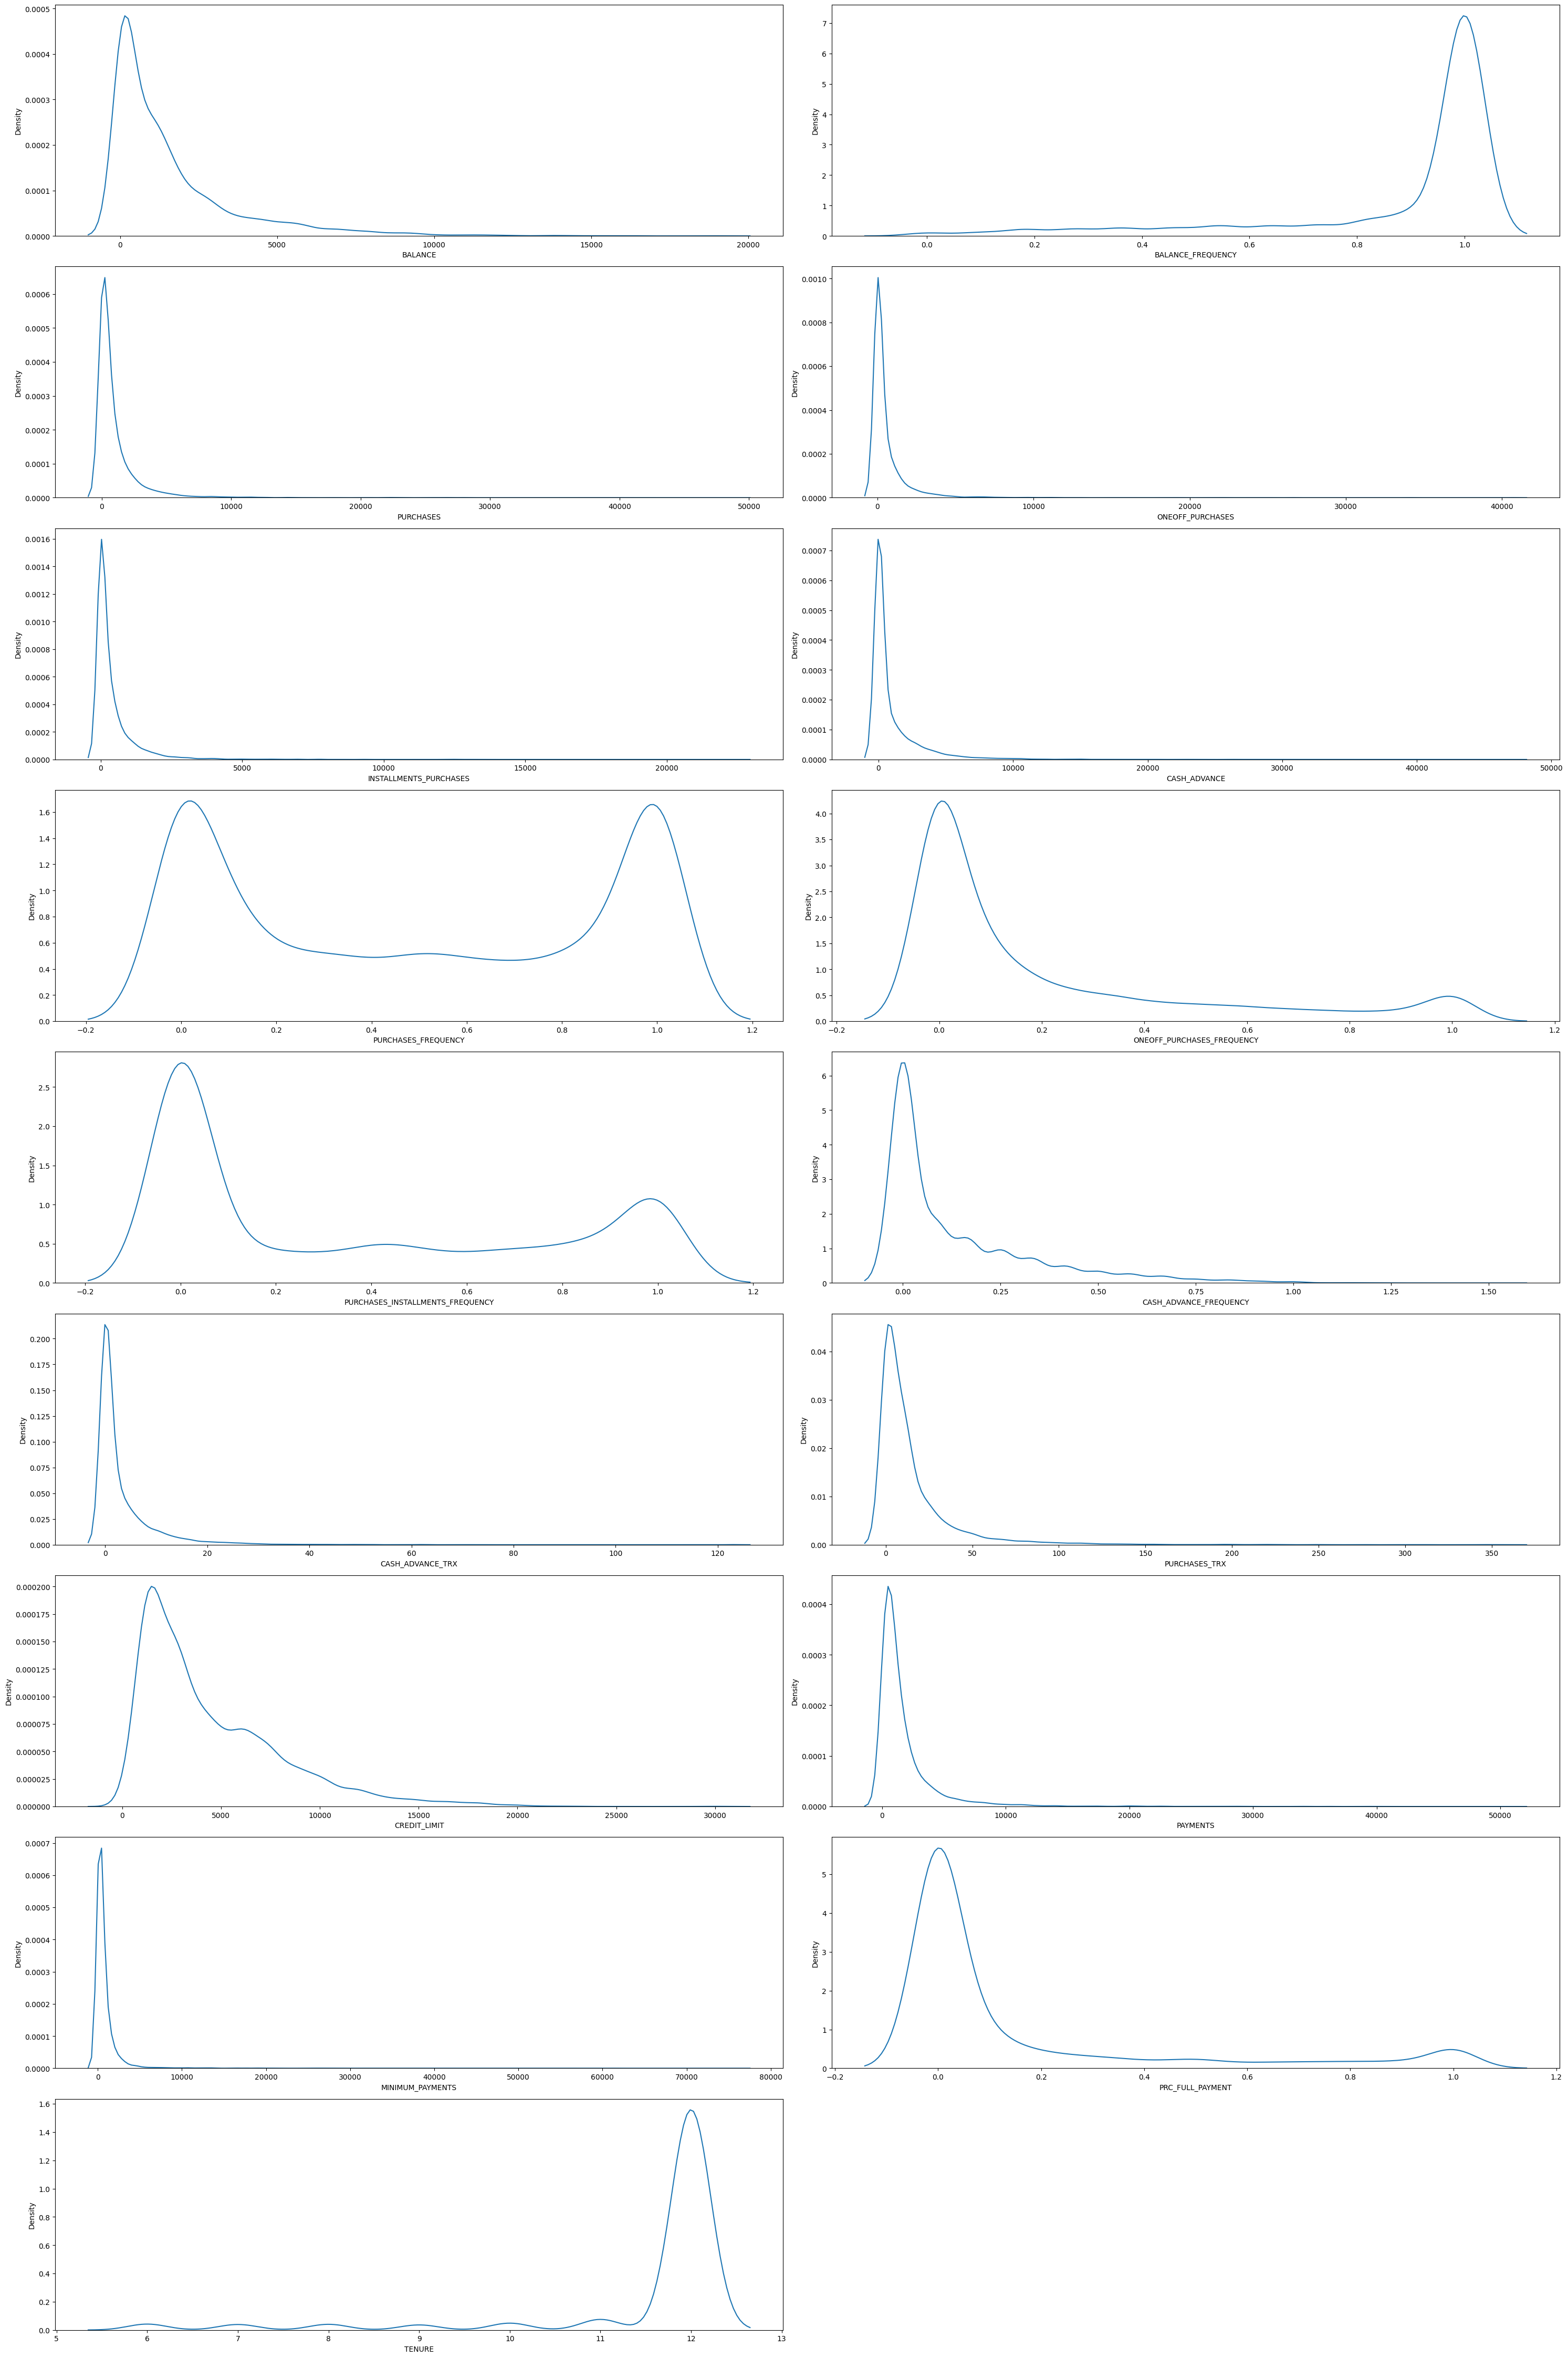

In [16]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
  if df[col].dtype != 'object':
    ax = plt.subplot(9,2, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.xlabel(col)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Correlation analysis

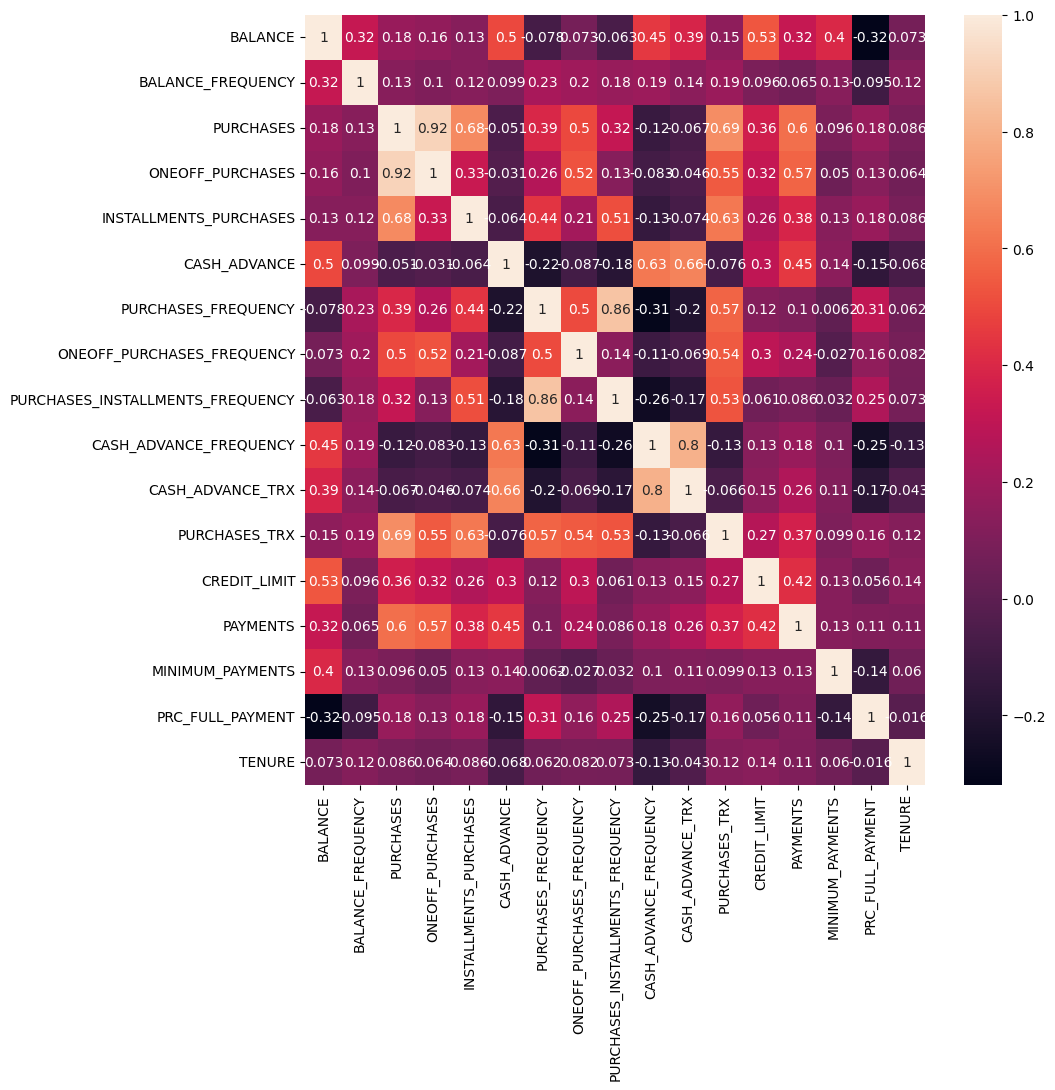

In [17]:
plt.figure(figsize=(10,10))

corr =df.corr()

sns.heatmap(corr, annot=True)
plt.show()

In [18]:
corr_pairs = corr.unstack()

corr_pairs

BALANCE  BALANCE                   1.000000
         BALANCE_FREQUENCY         0.322412
         PURCHASES                 0.181261
         ONEOFF_PURCHASES          0.164350
         INSTALLMENTS_PURCHASES    0.126469
                                     ...   
TENURE   CREDIT_LIMIT              0.139222
         PAYMENTS                  0.106136
         MINIMUM_PAYMENTS          0.060006
         PRC_FULL_PAYMENT         -0.016486
         TENURE                    1.000000
Length: 289, dtype: float64

In [19]:
sorted_corr = corr_pairs.sort_values(ascending=False)

sorted_corr

BALANCE                 BALANCE                             1.000000
BALANCE_FREQUENCY       BALANCE_FREQUENCY                   1.000000
PRC_FULL_PAYMENT        PRC_FULL_PAYMENT                    1.000000
MINIMUM_PAYMENTS        MINIMUM_PAYMENTS                    1.000000
PAYMENTS                PAYMENTS                            1.000000
                                                              ...   
CASH_ADVANCE_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   -0.262958
                        PURCHASES_FREQUENCY                -0.308478
PURCHASES_FREQUENCY     CASH_ADVANCE_FREQUENCY             -0.308478
BALANCE                 PRC_FULL_PAYMENT                   -0.318959
PRC_FULL_PAYMENT        BALANCE                            -0.318959
Length: 289, dtype: float64

In [20]:
high_corr = sorted_corr[(sorted_corr > 0.5) &  (sorted_corr < 1)]
high_corr = high_corr.drop_duplicates()
high_corr

ONEOFF_PURCHASES                  PURCHASES                           0.916845
PURCHASES_FREQUENCY               PURCHASES_INSTALLMENTS_FREQUENCY    0.862934
CASH_ADVANCE_TRX                  CASH_ADVANCE_FREQUENCY              0.799561
PURCHASES                         PURCHASES_TRX                       0.689561
                                  INSTALLMENTS_PURCHASES              0.679896
CASH_ADVANCE_TRX                  CASH_ADVANCE                        0.656498
CASH_ADVANCE_FREQUENCY            CASH_ADVANCE                        0.628522
PURCHASES_TRX                     INSTALLMENTS_PURCHASES              0.628108
PURCHASES                         PAYMENTS                            0.603264
PURCHASES_FREQUENCY               PURCHASES_TRX                       0.568430
ONEOFF_PURCHASES                  PAYMENTS                            0.567292
PURCHASES_TRX                     ONEOFF_PURCHASES                    0.545523
                                  ONEOFF_PURCHASES_FREQUENCY          0.544869
BALANCE                           CREDIT_LIMIT                        0.531296
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_TRX                       0.529975
ONEOFF_PURCHASES                  ONEOFF_PURCHASES_FREQUENCY          0.524891
INSTALLMENTS_PURCHASES            PURCHASES_INSTALLMENTS_FREQUENCY    0.511351
ONEOFF_PURCHASES_FREQUENCY        PURCHASES_FREQUENCY                 0.501343
dtype: float64

# Feature Scaling

In [40]:
standard_scaler = StandardScaler()

In [41]:
scaled_df = standard_scaler.fit_transform(df)

ensure that all feature have mean of 0 and standard deviation of 1

In [42]:
standard_scaler.mean_

array([1.56447483e+03, 8.77270726e-01, 1.00320483e+03, 5.92437371e+02,
       4.11067645e+02, 9.78871112e+02, 4.90350548e-01, 2.02457684e-01,
       3.64437342e-01, 1.35144200e-01, 3.24882682e+00, 1.47098324e+01,
       4.49428247e+03, 1.73314385e+03, 8.44906767e+02, 1.53714648e-01,
       1.15173184e+01])

In [43]:
scaled_df

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

# Model Building

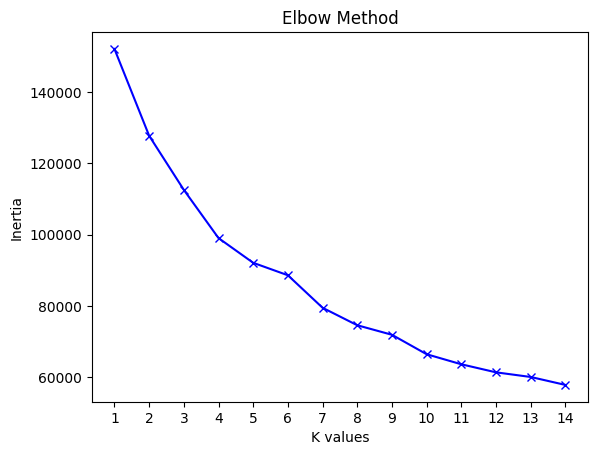

In [44]:
inertia = []
range_value = range(1,15)
for i in range_value:
  kmean = KMeans(n_clusters = i)
  kmean.fit_predict(pd.DataFrame(scaled_df))
  inertia.append(kmean.inertia_)

plt.plot(range_value, inertia, 'bx-')
plt.xlabel('K values')
plt.ylabel('Inertia')
plt.xticks(range(1,15))
plt.title('Elbow Method')
plt.show()

# Dimensionality reduction using PCA

In [45]:
pca = PCA(n_components= 2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df


,PCA1,PCA2
0,-1.683649,-1.072241
1,-1.134085,2.509150
2,0.969395,-0.383577
3,-0.888220,0.004648
4,-1.600021,-0.683795
...,...,...
8945,-0.362572,-2.013437
8946,-0.580810,-1.675663
8947,-0.928985,-1.808048
8948,-2.337845,-0.653611


In [46]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

In [47]:
pca_df_kmeans

,PCA1,PCA2,cluster
0,-1.683649,-1.072241,1
1,-1.134085,2.509150,3
2,0.969395,-0.383577,0
3,-0.888220,0.004648,1
4,-1.600021,-0.683795,1
...,...,...,...
8945,-0.362572,-2.013437,0
8946,-0.580810,-1.675663,0
8947,-0.928985,-1.808048,0
8948,-2.337845,-0.653611,1


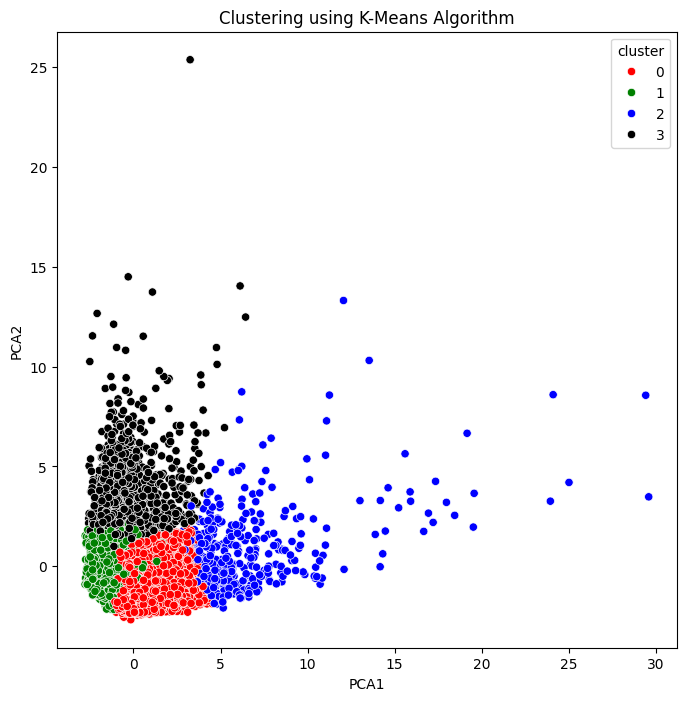

In [48]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [37]:
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.270469,-0.376097,-0.342068,-0.230193,-0.385713,-0.186528,-0.788380,-0.388065,-0.705927,-0.108879,-0.170144,-0.472806,-0.335800,-0.263813,-0.126300,-0.256930,-0.052831
1,0.975456,0.466690,3.188550,2.783848,2.425095,-0.134901,1.135625,1.812260,1.064826,-0.310555,-0.154505,3.045176,1.443802,1.962088,0.489980,0.459303,0.322940
2,-0.316260,0.253284,0.117080,0.006257,0.265106,-0.365173,0.989481,0.327251,0.879153,-0.461165,-0.359505,0.307291,-0.069014,-0.132286,-0.085002,0.398033,0.060357
3,1.449279,0.385375,-0.240081,-0.169355,-0.256621,1.671452,-0.514703,-0.220559,-0.457603,1.738971,1.608131,-0.289296,0.826090,0.594475,0.491736,-0.406393,-0.098781


In [49]:
cluster_centers = standard_scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1001.515947,0.788177,272.370612,210.364130,62.272566,587.712934,0.173936,0.086690,0.083884,0.113356,2.087719,2.957644,3272.494570,969.431873,550.291852,0.078567,11.446617
1,3594.804621,0.987825,7815.591616,5213.055404,2604.051364,695.978299,0.946132,0.743090,0.787626,0.072999,2.194444,90.401515,9747.474747,7413.195964,1987.863738,0.288053,11.949495
2,906.206541,0.937271,1253.347114,602.822370,650.800021,213.086711,0.887477,0.300083,0.713835,0.042860,0.795468,22.347943,4243.178370,1350.187657,646.626359,0.270132,11.598092
3,4581.026209,0.968562,490.267785,311.343322,179.008488,4483.984804,0.283775,0.136661,0.182574,0.483130,14.223140,7.519008,7499.962434,3454.090328,1991.960518,0.034852,11.385124


In [50]:
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)

cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [52]:
cluster_df['Cluster'].unique()

array([1, 3, 0, 2], dtype=int32)

In [53]:
cluster_1_df = cluster_df[cluster_df['Cluster'] == 0]
cluster_1_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
2,2495.148862,1.000000,773.17,773.17,0.00,0.0,1.000000,1.00,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.00,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.00,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.00,12,0
7,1823.652743,1.000000,436.20,0.00,436.20,0.0,1.000000,0.00,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.00,12,0
10,1293.124939,1.000000,920.12,0.00,920.12,0.0,1.000000,0.00,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.00,12,0
12,1516.928620,1.000000,3217.99,2500.23,717.76,0.0,1.000000,0.25,0.916667,0.0,0,26,3000.0,608.263689,490.207013,0.25,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,130.838554,1.000000,591.24,0.00,591.24,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,475.523262,82.771320,1.00,6,0
8942,40.829749,1.000000,113.28,0.00,113.28,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,94.488828,86.283101,0.25,6,0
8945,28.493517,1.000000,291.12,0.00,291.12,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,325.594462,48.886365,0.50,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,275.861322,312.343947,0.00,6,0


In [54]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.00,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12,1
8,1014.926473,1.000000,861.49,661.49,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.00,12,1
9,152.225975,0.545455,1281.60,1281.60,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.00,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,728.352548,1.000000,734.40,734.40,0.0,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,0.00,6,1
8943,5.871712,0.500000,20.90,20.90,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6,1
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,312.343947,0.00,6,1
8948,13.457564,0.833333,0.00,0.00,0.0,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,1


In [55]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_3_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,2
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12,2
57,2386.330629,1.000000,5217.62,4789.09,428.53,0.000000,0.916667,0.916667,0.500000,0.000000,0,42,7500.0,5678.729613,1311.514878,0.083333,12,2
84,1935.362486,1.000000,4915.60,4515.34,400.26,293.844792,1.000000,1.000000,0.333333,0.083333,1,50,9000.0,4921.066897,594.756686,0.000000,12,2
90,9381.255094,1.000000,5100.07,1147.83,3952.24,370.737197,1.000000,0.250000,0.916667,0.083333,1,46,9000.0,6409.496345,9827.045323,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8215,4436.557694,1.000000,6005.90,5838.38,167.52,567.971877,1.000000,0.583333,0.916667,0.083333,1,61,10500.0,1650.425296,1067.515656,0.000000,12,2
8541,3326.323283,1.000000,8209.77,2218.28,5991.49,0.000000,1.000000,0.416667,1.000000,0.000000,0,130,10000.0,1942.074765,702.905059,0.083333,12,2
8662,599.909949,1.000000,4947.32,3149.59,1797.73,0.000000,1.000000,1.000000,0.916667,0.000000,0,73,3000.0,5024.430008,218.172915,0.083333,12,2
8689,368.318662,0.909091,8053.95,8053.95,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,46,2000.0,7966.582037,219.761189,0.777778,12,2


In [56]:

cluster_4_df = cluster_df[cluster_df["Cluster"] == 3]
cluster_4_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,3
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,3
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11,3
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.000000,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,2330.222764,1.000000,1320.00,0.00,1320.00,14926.790590,0.428571,0.000000,0.285714,0.571429,10,3,10000.0,8157.666434,283.362434,0.200000,7,3
8858,812.934042,1.000000,50.00,50.00,0.00,2185.500596,0.142857,0.142857,0.000000,1.000000,16,1,3000.0,726.683966,127.843735,0.000000,7,3
8869,2171.222526,1.000000,791.18,791.18,0.00,2056.602480,0.428571,0.428571,0.000000,0.571429,6,8,3000.0,300.088696,453.100425,0.000000,7,3
8915,381.341657,1.000000,78.00,0.00,78.00,934.808869,1.000000,0.000000,0.833333,0.666667,16,6,1000.0,143.118373,85.152441,0.000000,6,3


<Axes: xlabel='Cluster', ylabel='count'>

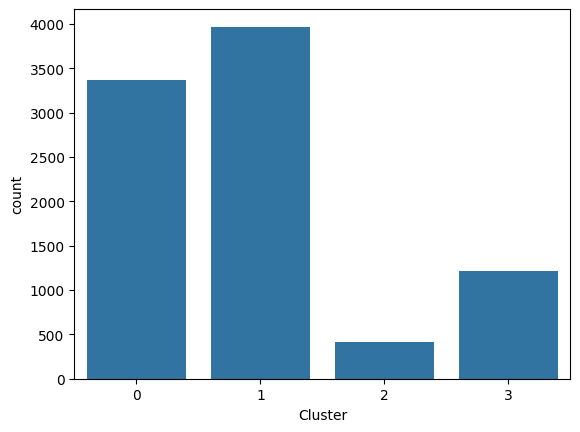

In [57]:
sns.countplot(x='Cluster', data=cluster_df)

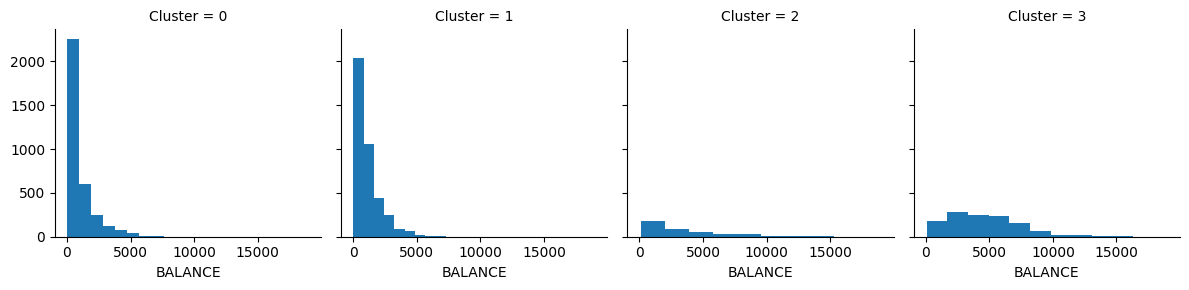

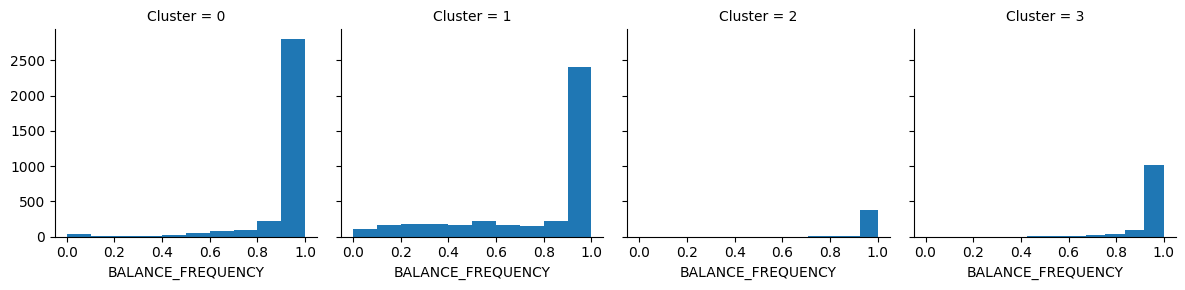

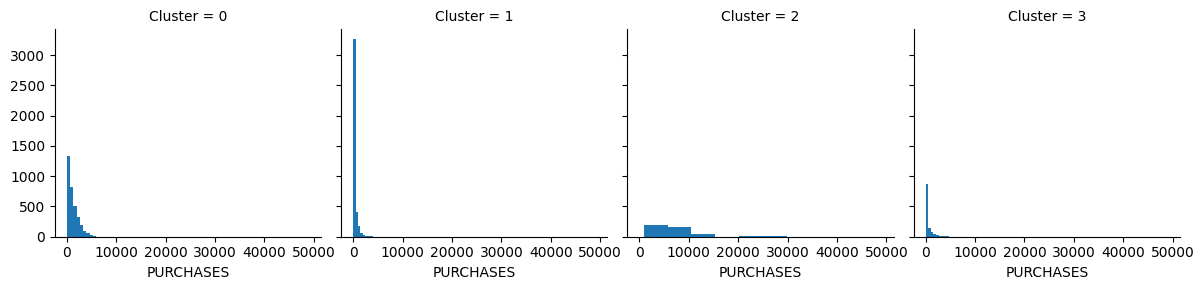

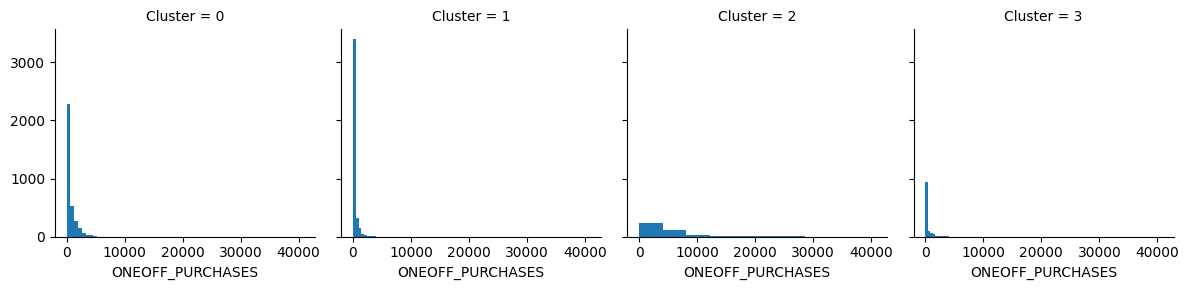

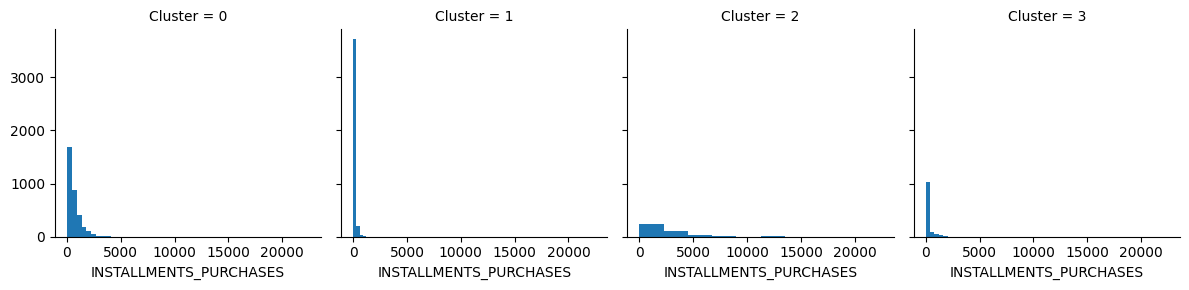

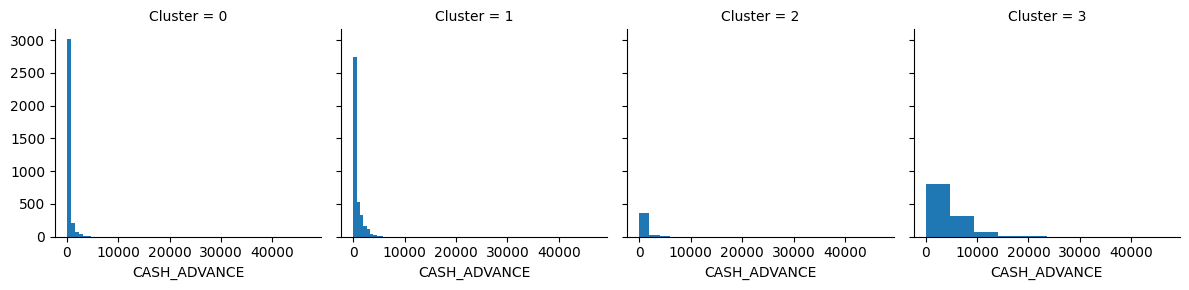

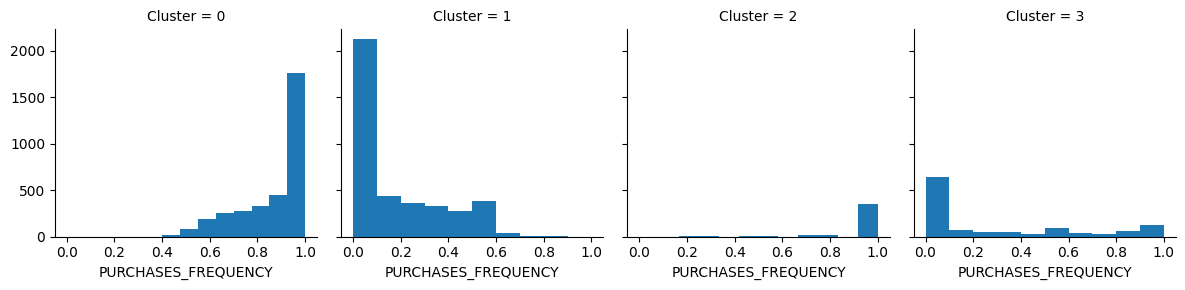

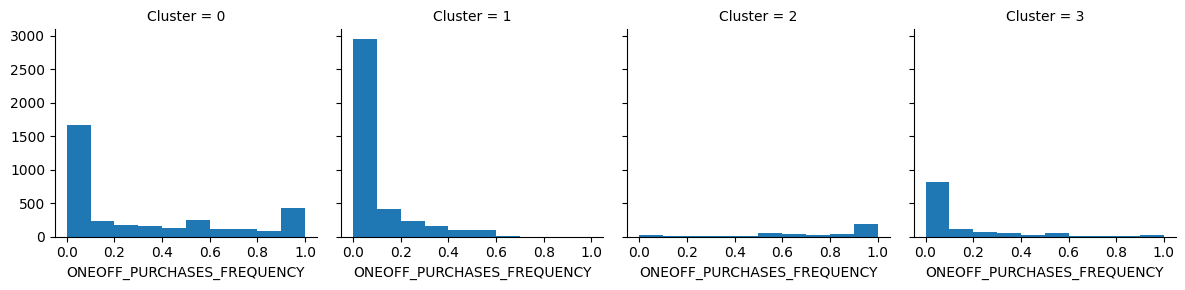

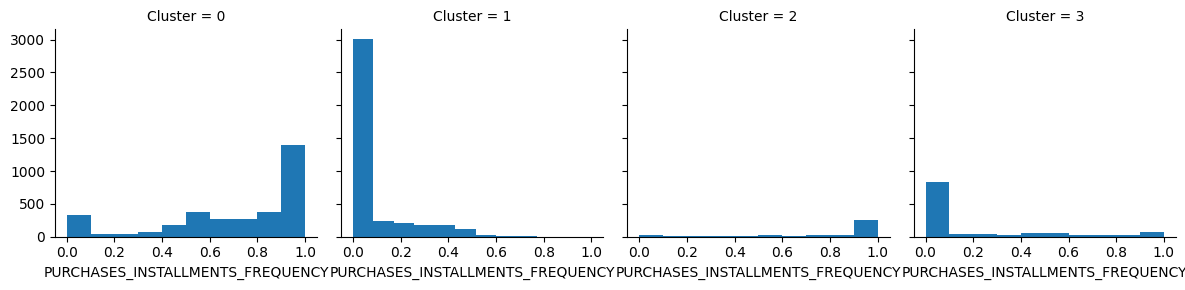

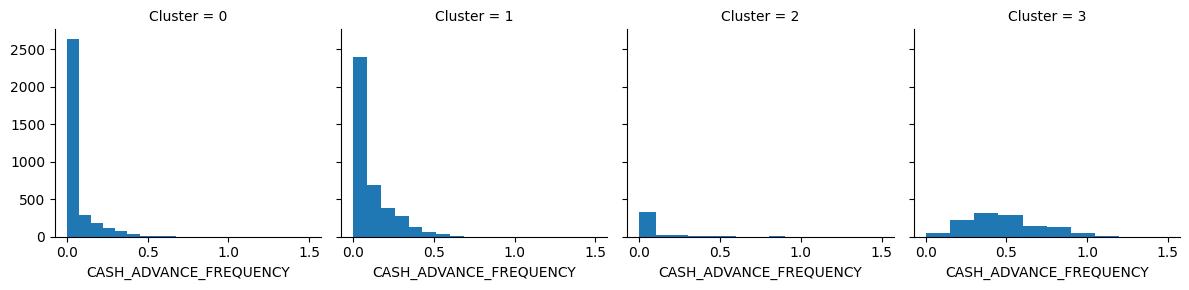

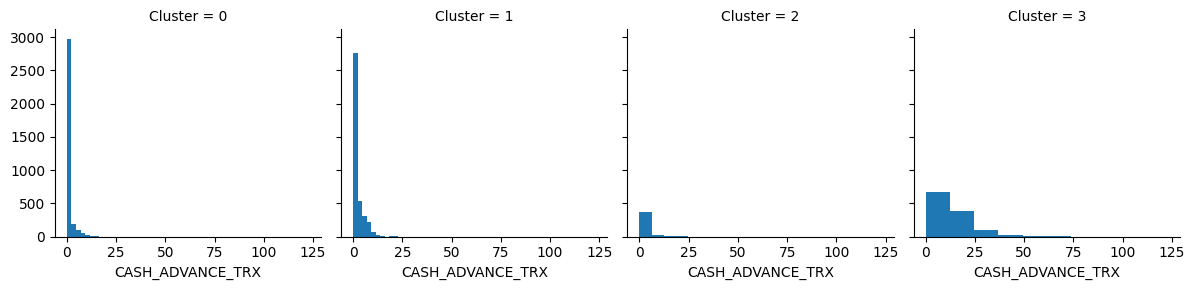

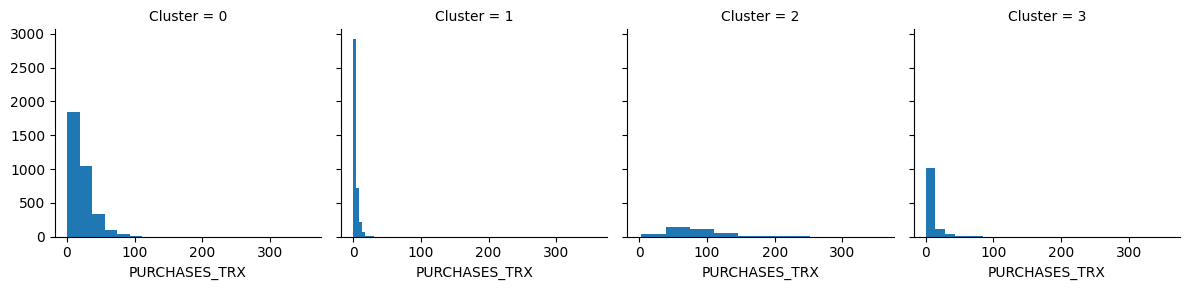

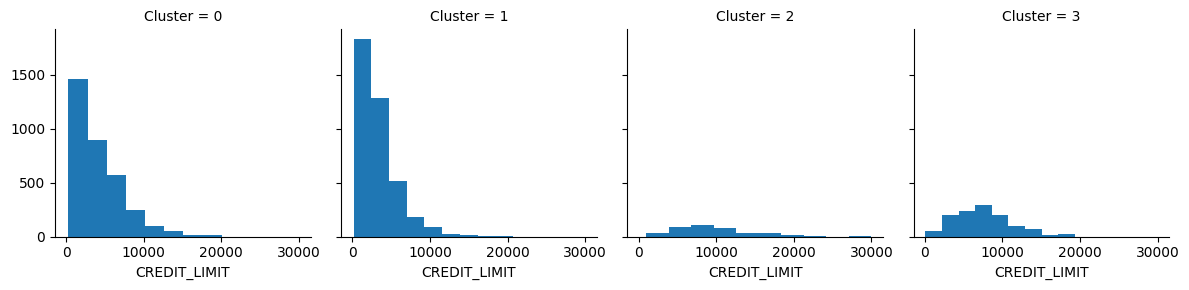

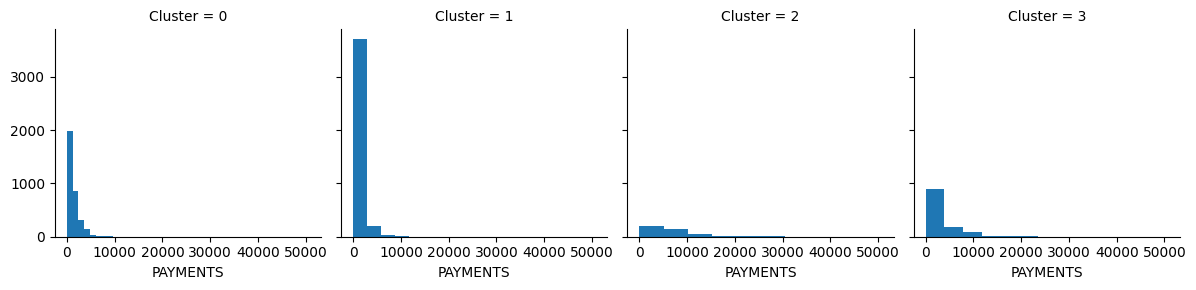

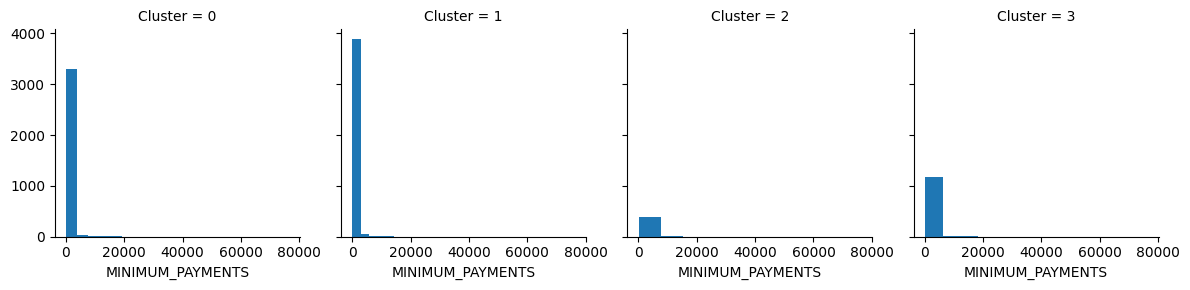

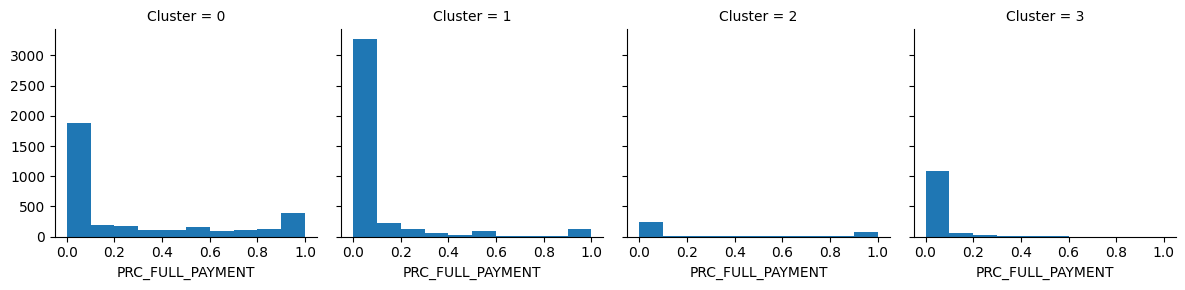

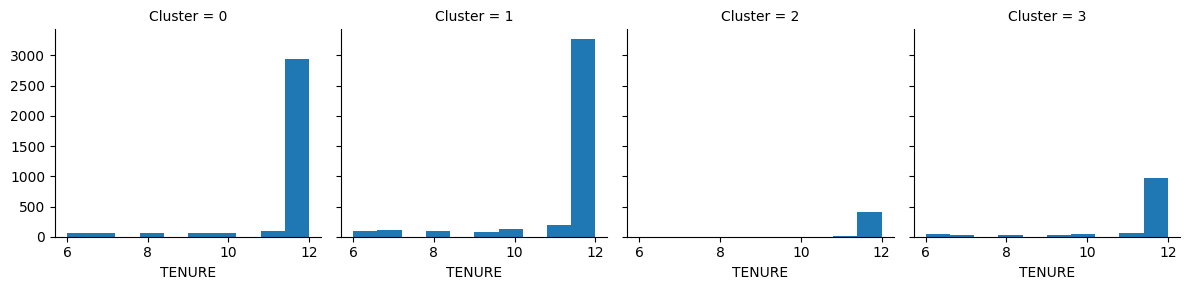

In [58]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

In [59]:
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [60]:
cluster_df.to_csv('clustered_data_customer.csv')

In [64]:
import plotly.express as px
import pandas as pd
import numpy as np

# Sample data generation for demonstration (replace with actual data)
np.random.seed(42)
cluster_1_df = pd.DataFrame({'BALANCE': np.random.rand(10)*500, 'PAYMENTS': np.random.rand(10)*300})
cluster_2_df = pd.DataFrame({'BALANCE': np.random.rand(10)*500 + 500, 'PAYMENTS': np.random.rand(10)*300 + 300})
cluster_3_df = pd.DataFrame({'BALANCE': np.random.rand(10)*500 + 1000, 'PAYMENTS': np.random.rand(10)*300 + 600})
cluster_4_df = pd.DataFrame({'BALANCE': np.random.rand(10)*500 + 1500, 'PAYMENTS': np.random.rand(10)*300 + 900})

# Create a Plotly figure and add each cluster as a separate trace
fig = px.scatter(
    x=cluster_1_df['BALANCE'], y=cluster_1_df['PAYMENTS'],
    labels={"x": "BALANCE", "y": "PAYMENTS"},
    title="2D Scatter Plot of Clusters"
)

# Add each cluster as separate traces with different colors
fig.add_scatter(x=cluster_1_df['BALANCE'], y=cluster_1_df['PAYMENTS'], mode='markers', marker=dict(color='red'), name='Cluster 1')
fig.add_scatter(x=cluster_2_df['BALANCE'], y=cluster_2_df['PAYMENTS'], mode='markers', marker=dict(color='blue'), name='Cluster 2')
fig.add_scatter(x=cluster_3_df['BALANCE'], y=cluster_3_df['PAYMENTS'], mode='markers', marker=dict(color='green'), name='Cluster 3')
fig.add_scatter(x=cluster_4_df['BALANCE'], y=cluster_4_df['PAYMENTS'], mode='markers', marker=dict(color='black'), name='Cluster 4')

# Customize layout for appearance
fig.update_layout(
    xaxis_title="BALANCE",
    yaxis_title="PAYMENTS",
    width=900,
    height=500
)

# Show the interactive plot
fig.show()


In [63]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Sample data generation for demonstration (replace with actual data)
np.random.seed(42)
cluster_1_df = pd.DataFrame({'BALANCE': np.random.rand(10)*500, 'PAYMENTS': np.random.rand(10)*300, 'CREDIT_LIMIT': np.random.rand(10)*1000})
cluster_2_df = pd.DataFrame({'BALANCE': np.random.rand(10)*500 + 500, 'PAYMENTS': np.random.rand(10)*300 + 300, 'CREDIT_LIMIT': np.random.rand(10)*1000 + 500})
cluster_3_df = pd.DataFrame({'BALANCE': np.random.rand(10)*500 + 1000, 'PAYMENTS': np.random.rand(10)*300 + 600, 'CREDIT_LIMIT': np.random.rand(10)*1000 + 1000})
cluster_4_df = pd.DataFrame({'BALANCE': np.random.rand(10)*500 + 1500, 'PAYMENTS': np.random.rand(10)*300 + 900, 'CREDIT_LIMIT': np.random.rand(10)*1000 + 1500})

# Create the 3D scatter plot
fig = go.Figure()

# Add traces for each cluster
fig.add_trace(go.Scatter3d(
    x=cluster_1_df['BALANCE'],
    y=cluster_1_df['PAYMENTS'],
    z=cluster_1_df['CREDIT_LIMIT'],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Cluster 1'
))

fig.add_trace(go.Scatter3d(
    x=cluster_2_df['BALANCE'],
    y=cluster_2_df['PAYMENTS'],
    z=cluster_2_df['CREDIT_LIMIT'],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Cluster 2'
))

fig.add_trace(go.Scatter3d(
    x=cluster_3_df['BALANCE'],
    y=cluster_3_df['PAYMENTS'],
    z=cluster_3_df['CREDIT_LIMIT'],
    mode='markers',
    marker=dict(size=5, color='green'),
    name='Cluster 3'
))

fig.add_trace(go.Scatter3d(
    x=cluster_4_df['BALANCE'],
    y=cluster_4_df['PAYMENTS'],
    z=cluster_4_df['CREDIT_LIMIT'],
    mode='markers',
    marker=dict(size=5, color='black'),
    name='Cluster 4'
))

# Set labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='BALANCE',
        yaxis_title='PAYMENTS',
        zaxis_title='CREDIT_LIMIT'
    ),
    title='Interactive 3D Scatter Plot of Clusters'
)

# Show plot
fig.show()

# Train and Test the model accuracy using decision tree


In [65]:
X = cluster_df.drop(['Cluster'], axis=1)
y = cluster_df['Cluster']

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [66]:
X_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1979,360.774263,1.0,2437.80,1788.30,649.50,0.000000,1.000000,1.000000,0.500000,0.000000,0,30,7500.0,2204.789548,186.937922,0.083333,12
1883,3171.175410,1.0,109.16,0.00,109.16,4586.702891,0.083333,0.000000,0.083333,0.333333,10,1,6000.0,598.082230,1307.447265,0.000000,12
438,969.294446,1.0,0.00,0.00,0.00,340.249539,0.000000,0.000000,0.000000,0.083333,1,0,1200.0,591.853821,204.676682,0.000000,12
6275,2277.067891,1.0,7025.02,7025.02,0.00,0.000000,0.750000,0.750000,0.000000,0.000000,0,33,3500.0,6063.454720,2283.354515,0.083333,12
4394,1893.053845,1.0,746.31,487.27,259.04,1535.853619,0.666667,0.250000,0.416667,0.416667,12,14,4200.0,3286.143282,735.695479,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454,10915.550750,1.0,0.00,0.00,0.00,23130.821060,0.000000,0.000000,0.000000,0.583333,23,0,15000.0,18341.954670,3127.192305,0.000000,12
7215,1175.895992,1.0,154.38,154.38,0.00,37.197366,0.083333,0.083333,0.000000,0.083333,1,2,4000.0,1909.161919,426.237080,0.083333,12
3104,4028.315428,1.0,0.00,0.00,0.00,275.691831,0.000000,0.000000,0.000000,0.083333,1,0,4500.0,892.224219,1572.219063,0.000000,12
8392,383.449462,1.0,1159.06,1146.06,13.00,0.000000,0.750000,0.750000,0.083333,0.000000,0,28,500.0,1346.951277,262.260305,0.083333,12


In [67]:

#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [68]:

#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 973   20    8   17]
 [  25 1119    0   35]
 [  16    1  105    2]
 [   9   27    4  324]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1018
           1       0.96      0.95      0.95      1179
           2       0.90      0.85      0.87       124
           3       0.86      0.89      0.87       364

    accuracy                           0.94      2685
   macro avg       0.92      0.91      0.91      2685
weighted avg       0.94      0.94      0.94      2685



In [69]:

import pickle
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9389199255121042 % Acuuracy
